ДЗ 08 Бернатович 12.10.2022

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

In [152]:
import numpy as np
import pandas as pd

In [153]:
df = pd.read_excel('D:\Data Sciense курсы\DS3onl\Bernatovich Ekaterina\ДЗ_08\Real estate valuation data set.xlsx')

In [154]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [155]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

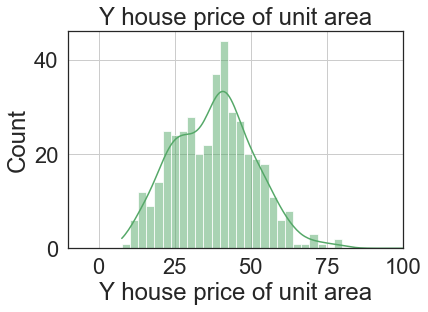

In [157]:
sns.set_palette ("hls")
sns.histplot(df['Y house price of unit area'],color="g",bins=41,kde=True)
plt.title('Y house price of unit area')
plt.xlim(-10,100)
plt.grid(True)
plt.show()

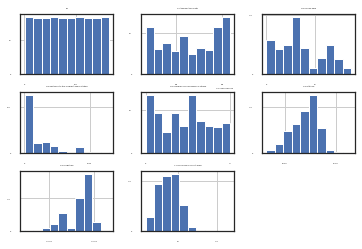

In [161]:
df.hist()
sns.set(style='white', font_scale=1)
plt.show()

In [162]:
#нормируем и преобразуем данные
from sklearn.preprocessing import MinMaxScaler
scalerminmax = MinMaxScaler(feature_range=(-1,1)) 
filt_df = scalerminmax.fit_transform(df)


In [163]:
filt_df

array([[-1.        , -0.45454541,  0.46118721, ...,  0.2338827 ,
         0.43864568, -0.44858963],
       [-0.99515738, -0.45454541, -0.10958904, ...,  0.16989821,
         0.42290274, -0.37033667],
       [-0.99031477,  1.        , -0.39269406, ...,  0.34246243,
         0.51779168, -0.27752502],
       ...,
       [ 0.99031477,  0.27272729, -0.14155251, ...,  0.14299564,
         0.43045072, -0.39945405],
       [ 0.99515738, -0.27272729, -0.63013699, ..., -0.15971886,
         0.44791891, -0.18289354],
       [ 1.        ,  0.81818188, -0.70319635, ...,  0.02423655,
         0.50032349,  0.02456779]])

In [164]:
from scipy.stats import norm

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


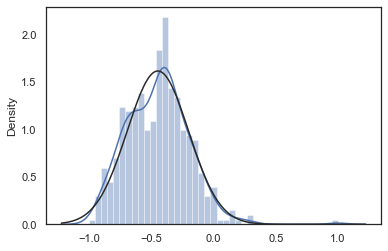

In [165]:
sns.distplot(filt_df[:,-1], fit=norm, bins = 41);

In [166]:
filt_df.shape

(414, 8)

In [167]:
#Процентный список пропущенных данных
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing*100))

No - 0.0%
X1 transaction date - 0.0%
X2 house age - 0.0%
X3 distance to the nearest MRT station - 0.0%
X4 number of convenience stores - 0.0%
X5 latitude - 0.0%
X6 longitude - 0.0%
Y house price of unit area - 0.0%


In [168]:
corr_matrix = df.corr()
corr_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


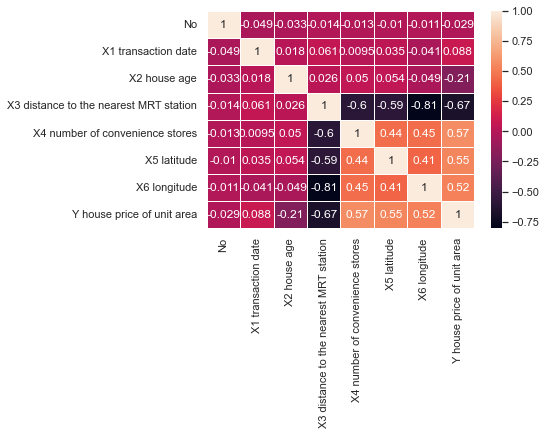

In [169]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, linewidths=1);

<AxesSubplot:>

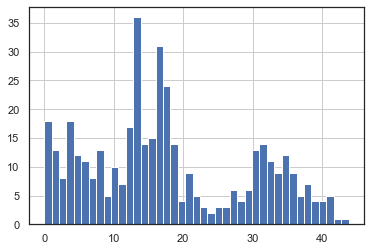

In [170]:
df['X2 house age'].hist(bins=41)

<AxesSubplot:>

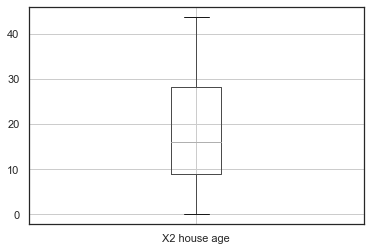

In [171]:
df.boxplot(column=['X2 house age'])

In [172]:
df['X2 house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: X2 house age, dtype: float64

In [173]:
import scipy.stats as stats

In [174]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#
df_clean.shape

(371, 8)

In [175]:
df_clean

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
408,409,2013.416667,18.5,2175.74400,3,24.96330,121.51243,28.1
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [176]:
df_clean.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,208.757412,2013.143980,17.475202,741.001846,4.493261,24.971224,121.536577,39.527763
std,120.433162,0.279475,11.742498,675.242324,2.780595,0.009795,0.010987,11.652456
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.948830,121.508270,7.600000
25%,104.500000,2012.916667,8.000000,279.172600,2.000000,24.964290,121.533355,30.650000
50%,210.000000,2013.166667,15.600000,461.784800,5.000000,24.972850,121.539900,40.000000
75%,313.000000,2013.416667,28.850000,1144.436000,7.000000,24.978655,121.543480,47.200000
max,414.000000,2013.583333,43.800000,3085.170000,10.000000,24.998000,121.561740,73.600000


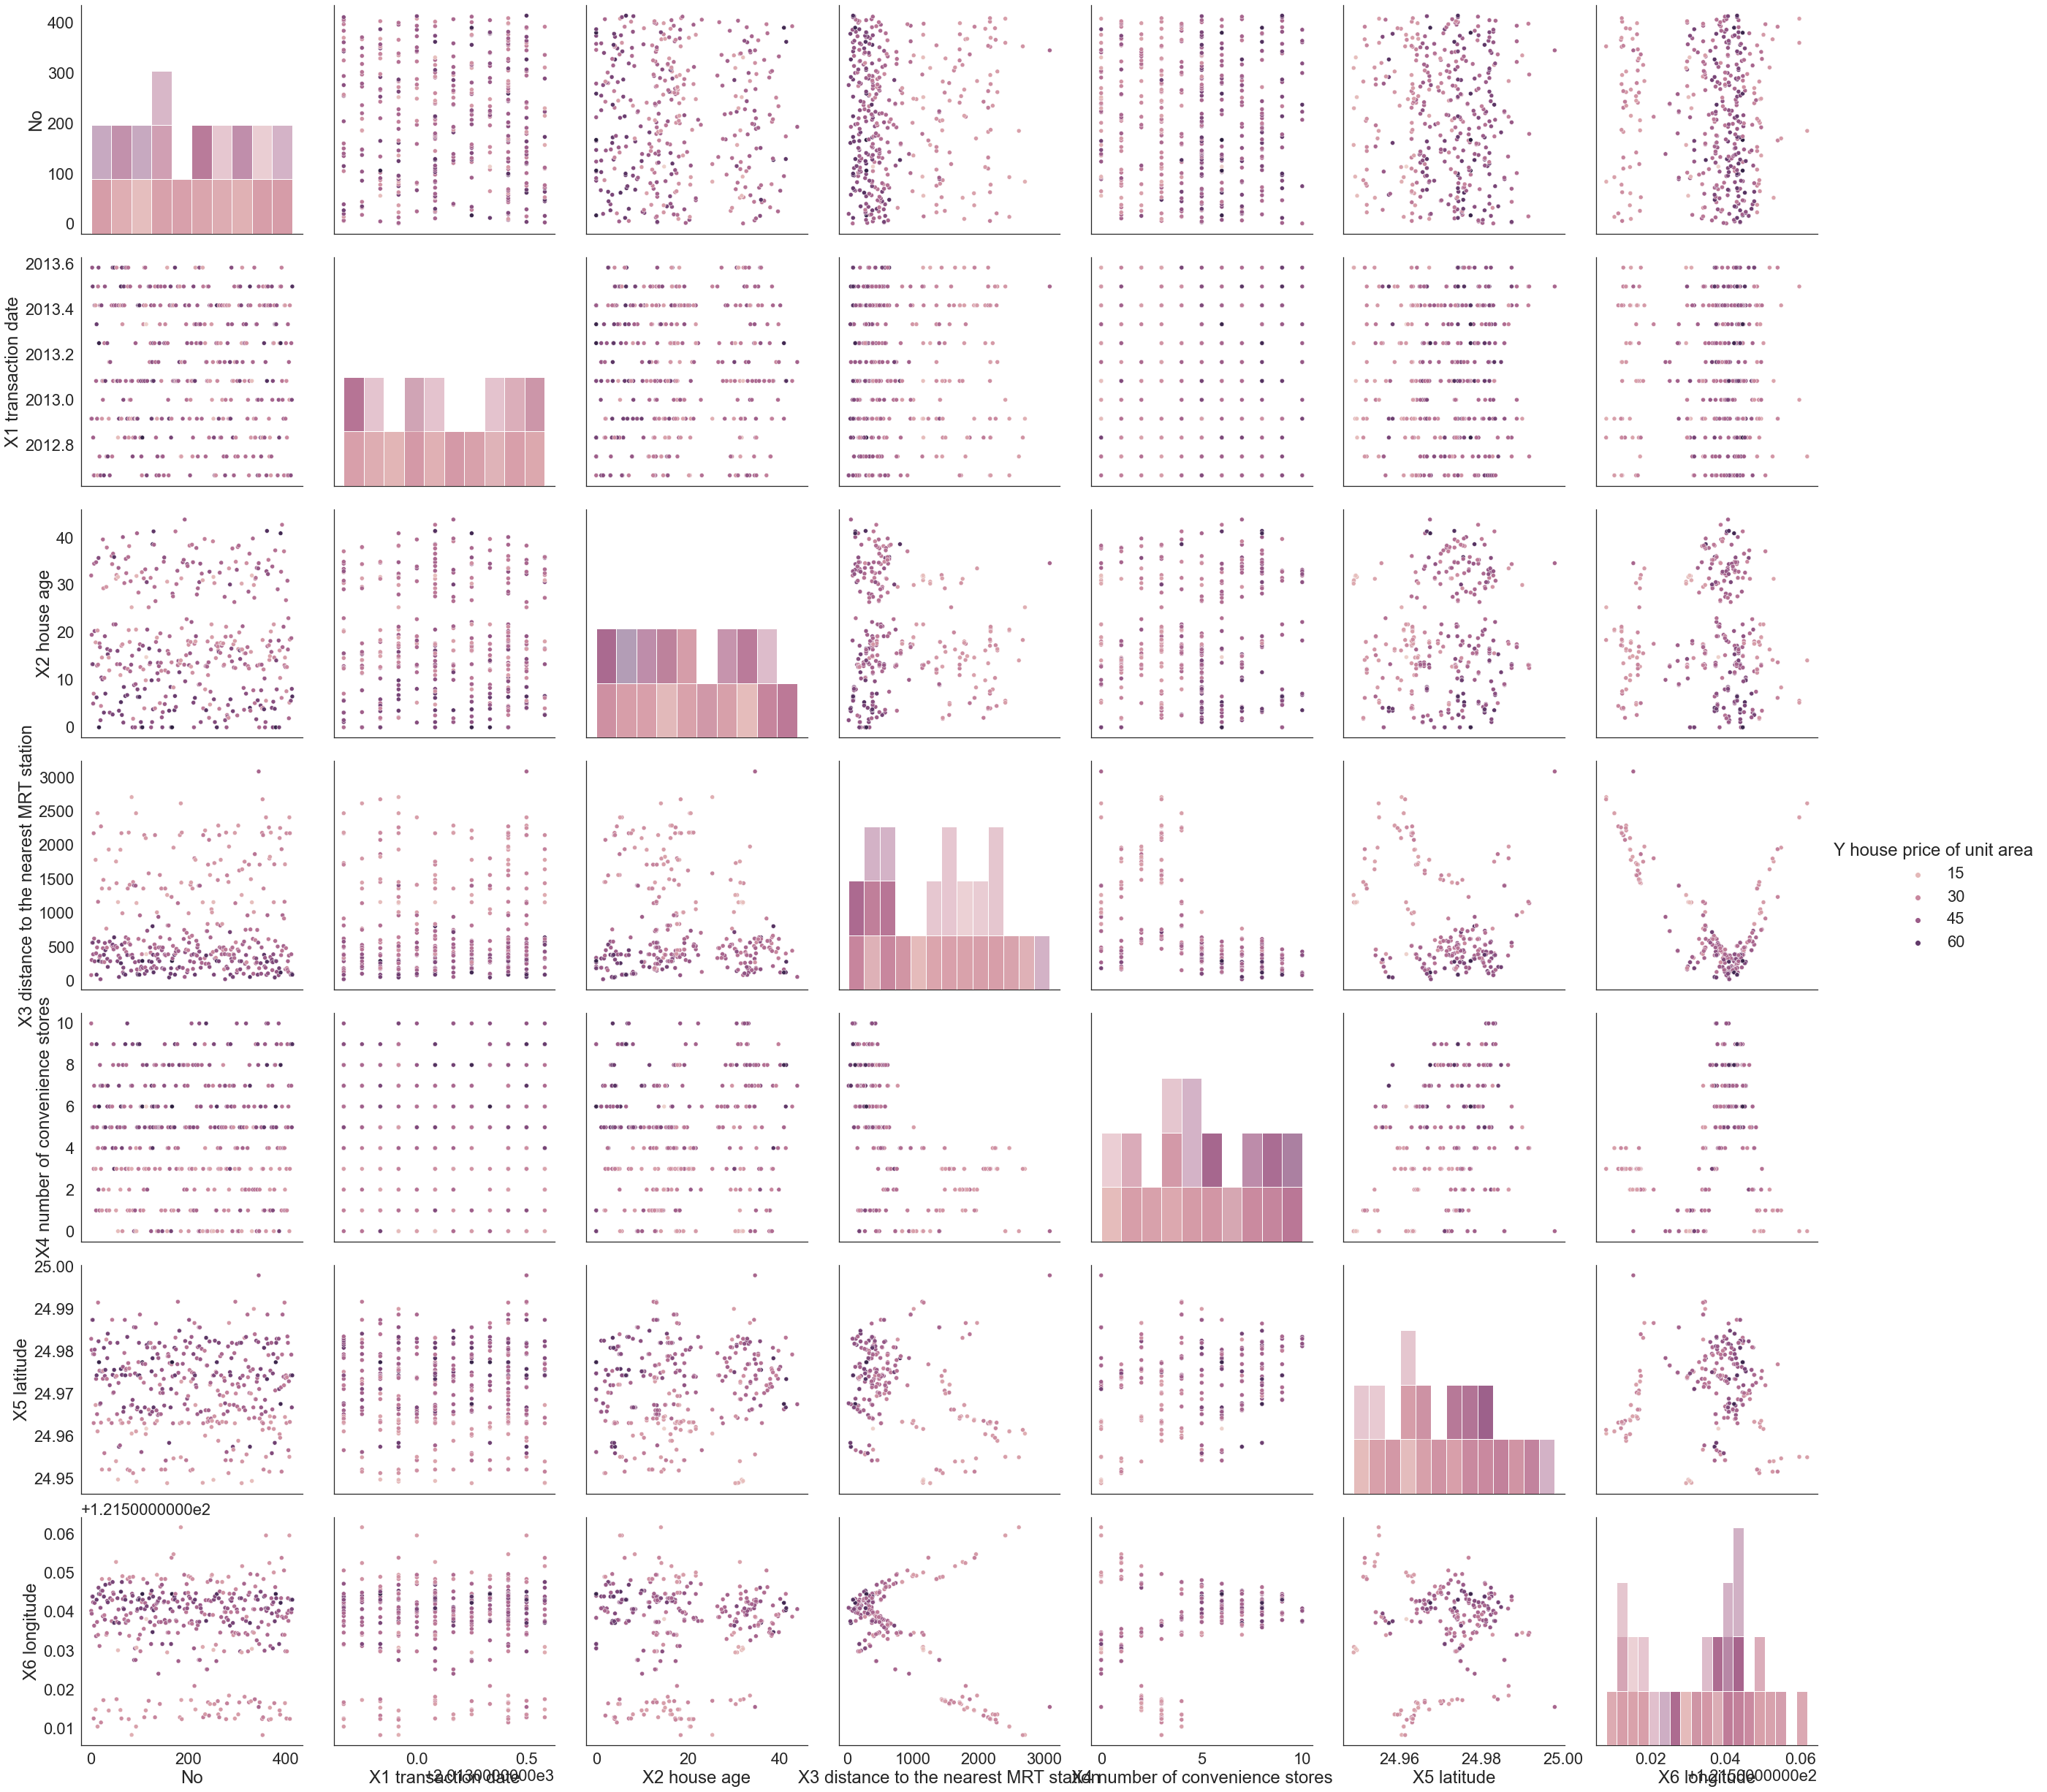

In [177]:
sns.set(style='white', font_scale=2)
g = sns.PairGrid(df_clean, hue="Y house price of unit area",height=5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [178]:
stat, p = stats.normaltest(df['Y house price of unit area'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=46.431, p-value=0.000
Отклонить гипотезу о нормальности
